In [36]:
import pandas as pd

In [37]:
#data = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/microglia_scatac/ATAC/summary.mean.variant_scores.peak_overlap.closest_genes.tsv", sep="\t", header=0)
data = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/microglia_scatac/ATAC/fold_0.variant_scores.tsv", sep="\t", header=0)

In [38]:
data

,chr,pos,allele1,allele2,rsid,allele1_pred_counts,allele2_pred_counts,logfc,abs_logfc,jsd,...,percentile_change,abs_percentile_change,abs_logfc_x_max_percentile,jsd_x_max_percentile,abs_logfc_x_jsd_x_max_percentile,max_percentile.pval,abs_percentile_change.pval,abs_logfc_x_max_percentile.pval,jsd_x_max_percentile.pval,abs_logfc_x_jsd_x_max_percentile.pval
0,chr2,199884843,A,G,chr2_199884843_A_G,35.99115,34.925217,-0.043373,0.043373,0.016950,...,-0.000145,0.000145,0.000039,0.000015,6.547641e-07,0.970932,0.773494,0.814426,0.915356,0.655782
1,chr2,200357680,A,T,chr2_200357680_A_T,76.10092,76.696120,0.011240,0.011240,0.008471,...,0.000604,0.000604,0.000265,0.000200,2.243831e-06,0.361085,0.483266,0.480909,0.349785,0.451186
2,chr2,200656660,T,C,chr2_200656660_T_C,80.46609,80.818390,0.006303,0.006303,0.005824,...,0.000358,0.000358,0.000174,0.000161,1.015409e-06,0.327350,0.597327,0.559606,0.392559,0.582336
3,chr1,172585461,A,G,chr1_172585461_A_G,45.78060,45.590786,-0.005994,0.005994,0.003971,...,-0.000056,0.000056,0.000022,0.000015,8.764022e-08,0.863187,0.891165,0.876846,0.918572,0.906573
4,chr1,172625478,C,T,chr1_172625478_C_T,106.23833,148.169570,0.479945,0.479945,0.052287,...,0.086740,0.086740,0.072190,0.007865,3.774593e-03,0.103345,0.005326,0.008735,0.014843,0.005543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,chr2,197453059,C,T,chr2_197453059_C_T,1206.34290,1203.673300,-0.003196,0.003196,0.003641,...,-0.000324,0.000324,0.003039,0.003462,1.106623e-05,0.000037,0.618838,0.145100,0.046348,0.237289
4841,chr2,198097196,A,G,chr2_198097196_A_G,190.29886,234.599850,0.301935,0.301935,0.026186,...,0.093787,0.093787,0.102647,0.008902,2.687937e-03,0.041178,0.004652,0.005497,0.011978,0.007437
4842,chr2,198097200,T,C,chr2_198097200_T_C,189.99200,164.184900,-0.210617,0.210617,0.020160,...,-0.058296,0.058296,0.051685,0.004947,1.041944e-03,0.063120,0.010113,0.013030,0.029864,0.015773
4843,chr2,198096665,T,G,chr2_198096665_T_G,226.31241,226.471560,0.001014,0.001014,0.006891,...,0.000328,0.000328,0.000328,0.002231,2.262594e-06,0.044262,0.616455,0.441797,0.072076,0.449908


In [39]:
gt = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/microglia_caqtls/Rousonly_sig.tsv", sep="\t", header=None)


In [40]:
gt

,0,1,2,3,4
0,chr2,199884842,A,G,"-8.42764,Peak--100075,2.78246e-16,1.2455357872..."
1,chr2,200357679,A,T,"-4.61924,Peak--100119,9.151825e-05,0.005522434..."
2,chr2,200656659,T,C,"-4.74954,Peak--100143,0.0004913505,0.022722444..."
3,chr1,172585460,A,G,"9.37451,Peak--10016,3.808717e-19,2.53256261204..."
4,chr1,172625477,C,T,"8.27532,Peak--10018,8.27175e-15,3.013410257978..."
...,...,...,...,...,...
4840,chr2,197453058,C,T,"4.76994,Peak--99809,1.825632e-05,0.00135773687..."
4841,chr2,198097195,A,G,"6.07593,Peak--99845,9.899754e-08,1.19650756197..."
4842,chr2,198097199,T,C,"-4.63841,Peak--99846,0.0004810067,0.0223446806..."
4843,chr2,198096664,T,G,"4.52954,Peak--99847,0.0007980153,0.03353067722..."


In [41]:
data.shape

(4845, 28)

In [42]:
gt.shape

(4845, 5)

In [43]:
cols = ["Z_score_perPeak", "PeakID",  "pVal_perPeak" , "FDR_acrossAllPeaks" , "caQTL_order" ,  "Variant", "Beta",  "Z_score_fixed" , "Z_score_random"]
gt[cols] = gt[4].str.split(",", expand=True)
gt['rsid'] = gt[0]+"_"+(gt[1]+1).astype(str)+"_"+gt[2]+"_"+gt[3]




In [44]:
data

,chr,pos,allele1,allele2,rsid,allele1_pred_counts,allele2_pred_counts,logfc,abs_logfc,jsd,...,percentile_change,abs_percentile_change,abs_logfc_x_max_percentile,jsd_x_max_percentile,abs_logfc_x_jsd_x_max_percentile,max_percentile.pval,abs_percentile_change.pval,abs_logfc_x_max_percentile.pval,jsd_x_max_percentile.pval,abs_logfc_x_jsd_x_max_percentile.pval
0,chr2,199884843,A,G,chr2_199884843_A_G,35.99115,34.925217,-0.043373,0.043373,0.016950,...,-0.000145,0.000145,0.000039,0.000015,6.547641e-07,0.970932,0.773494,0.814426,0.915356,0.655782
1,chr2,200357680,A,T,chr2_200357680_A_T,76.10092,76.696120,0.011240,0.011240,0.008471,...,0.000604,0.000604,0.000265,0.000200,2.243831e-06,0.361085,0.483266,0.480909,0.349785,0.451186
2,chr2,200656660,T,C,chr2_200656660_T_C,80.46609,80.818390,0.006303,0.006303,0.005824,...,0.000358,0.000358,0.000174,0.000161,1.015409e-06,0.327350,0.597327,0.559606,0.392559,0.582336
3,chr1,172585461,A,G,chr1_172585461_A_G,45.78060,45.590786,-0.005994,0.005994,0.003971,...,-0.000056,0.000056,0.000022,0.000015,8.764022e-08,0.863187,0.891165,0.876846,0.918572,0.906573
4,chr1,172625478,C,T,chr1_172625478_C_T,106.23833,148.169570,0.479945,0.479945,0.052287,...,0.086740,0.086740,0.072190,0.007865,3.774593e-03,0.103345,0.005326,0.008735,0.014843,0.005543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4840,chr2,197453059,C,T,chr2_197453059_C_T,1206.34290,1203.673300,-0.003196,0.003196,0.003641,...,-0.000324,0.000324,0.003039,0.003462,1.106623e-05,0.000037,0.618838,0.145100,0.046348,0.237289
4841,chr2,198097196,A,G,chr2_198097196_A_G,190.29886,234.599850,0.301935,0.301935,0.026186,...,0.093787,0.093787,0.102647,0.008902,2.687937e-03,0.041178,0.004652,0.005497,0.011978,0.007437
4842,chr2,198097200,T,C,chr2_198097200_T_C,189.99200,164.184900,-0.210617,0.210617,0.020160,...,-0.058296,0.058296,0.051685,0.004947,1.041944e-03,0.063120,0.010113,0.013030,0.029864,0.015773
4843,chr2,198096665,T,G,chr2_198096665_T_G,226.31241,226.471560,0.001014,0.001014,0.006891,...,0.000328,0.000328,0.000328,0.002231,2.262594e-06,0.044262,0.616455,0.441797,0.072076,0.449908


In [45]:
merged = gt.merge(data, on='rsid', how='inner').drop_duplicates()

In [46]:
merged.shape

(4845, 42)

In [47]:
merged

,0,1,2,3,4,Z_score_perPeak,PeakID,pVal_perPeak,FDR_acrossAllPeaks,caQTL_order,...,percentile_change,abs_percentile_change,abs_logfc_x_max_percentile,jsd_x_max_percentile,abs_logfc_x_jsd_x_max_percentile,max_percentile.pval,abs_percentile_change.pval,abs_logfc_x_max_percentile.pval,jsd_x_max_percentile.pval,abs_logfc_x_jsd_x_max_percentile.pval
0,chr2,199884842,A,G,"-8.42764,Peak--100075,2.78246e-16,1.2455357872...",-8.42764,Peak--100075,2.78246e-16,1.2455357872766899e-13,1,...,-0.000145,0.000145,0.000039,0.000015,6.547641e-07,0.970932,0.773494,0.814426,0.915356,0.655782
1,chr2,200357679,A,T,"-4.61924,Peak--100119,9.151825e-05,0.005522434...",-4.61924,Peak--100119,9.151825e-05,0.0055224342891336,1,...,0.000604,0.000604,0.000265,0.000200,2.243831e-06,0.361085,0.483266,0.480909,0.349785,0.451186
2,chr2,200656659,T,C,"-4.74954,Peak--100143,0.0004913505,0.022722444...",-4.74954,Peak--100143,0.0004913505,0.0227224447069548,1,...,0.000358,0.000358,0.000174,0.000161,1.015409e-06,0.327350,0.597327,0.559606,0.392559,0.582336
3,chr1,172585460,A,G,"9.37451,Peak--10016,3.808717e-19,2.53256261204...",9.37451,Peak--10016,3.808717e-19,2.5325626120453097e-16,1,...,-0.000056,0.000056,0.000022,0.000015,8.764022e-08,0.863187,0.891165,0.876846,0.918572,0.906573
4,chr1,172625477,C,T,"8.27532,Peak--10018,8.27175e-15,3.013410257978...",8.27532,Peak--10018,8.27175e-15,3.01341025797872e-12,1,...,0.086740,0.086740,0.072190,0.007865,3.774593e-03,0.103345,0.005326,0.008735,0.014843,0.005543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,chr2,197453058,C,T,"4.76994,Peak--99809,1.825632e-05,0.00135773687...",4.76994,Peak--99809,1.825632e-05,0.001357736877756,1,...,-0.000324,0.000324,0.003039,0.003462,1.106623e-05,0.000037,0.618838,0.145100,0.046348,0.237289
5633,chr2,198097195,A,G,"6.07593,Peak--99845,9.899754e-08,1.19650756197...",6.07593,Peak--99845,9.899754e-08,1.19650756197882e-05,1,...,0.093787,0.093787,0.102647,0.008902,2.687937e-03,0.041178,0.004652,0.005497,0.011978,0.007437
5634,chr2,198097199,T,C,"-4.63841,Peak--99846,0.0004810067,0.0223446806...",-4.63841,Peak--99846,0.0004810067,0.0223446806742482,1,...,-0.058296,0.058296,0.051685,0.004947,1.041944e-03,0.063120,0.010113,0.013030,0.029864,0.015773
5635,chr2,198096664,T,G,"4.52954,Peak--99847,0.0007980153,0.03353067722...",4.52954,Peak--99847,0.0007980153,0.033530677224908,1,...,0.000328,0.000328,0.000328,0.002231,2.262594e-06,0.044262,0.616455,0.441797,0.072076,0.449908


In [48]:
preds = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/microglia_caqtls/preds_fold0/snp_scores_bed_format_inpeaks.bed", sep="\t", header=None)


In [49]:
preds['rsid'] = preds[0]+"_"+(preds[2]).astype(str)+"_"+preds[3]+"_"+preds[4]

In [50]:
preds[10]

0       Peak--16416
1       Peak--22566
2       Peak--22961
3       Peak--23102
4       Peak--23268
           ...     
656    Peak--202061
657    Peak--202593
658    Peak--207178
659    Peak--207976
660    Peak--208045
Name: 10, Length: 661, dtype: object

In [51]:
merged = merged[merged["rsid"].isin(preds["rsid"])]

In [52]:
merged.shape

(661, 42)

In [53]:
preds.shape

(661, 19)

In [54]:
merged.columns

Index([                                      0,
                                             1,
                                             2,
                                             3,
                                             4,
                             'Z_score_perPeak',
                                      'PeakID',
                                'pVal_perPeak',
                          'FDR_acrossAllPeaks',
                                 'caQTL_order',
                                     'Variant',
                                        'Beta',
                               'Z_score_fixed',
                              'Z_score_random',
                                        'rsid',
                                         'chr',
                                         'pos',
                                     'allele1',
                                     'allele2',
                         'allele1_pred_counts',
                         'allele2_pred_c

In [57]:
#merged["abs_logfc_x_jsd_x_max_percentile.mean"] = merged["abs_logfc_x_jsd_x_max_percentile.mean"].astype(float)
merged["abs_logfc_x_jsd_x_max_percentile.mean"] = merged["abs_logfc_x_jsd_x_max_percentile"].astype(float)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
merged["Z_score_fixed"] = merged["Z_score_fixed"].astype(float)


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
import matplotlib.pyplot as plt

In [83]:
merged.shape

(661, 43)

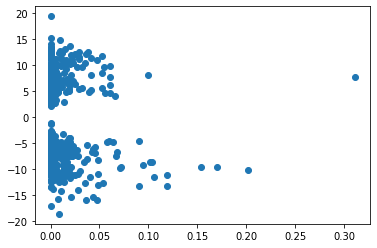

In [66]:
plt.scatter(merged["abs_logfc_x_jsd_x_max_percentile"], merged["Z_score_fixed"])

Text(0, 0.5, 'abs_logfc_x_jsd_x_max_percentile')

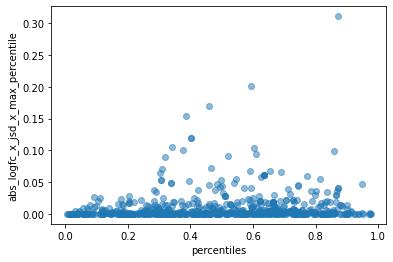

In [89]:
plt.scatter(merged["max_percentile"], merged["abs_logfc_x_jsd_x_max_percentile"], alpha=0.5)
plt.xlabel("percentiles")
plt.ylabel("abs_logfc_x_jsd_x_max_percentile")


Text(0, 0.5, 'jsd')

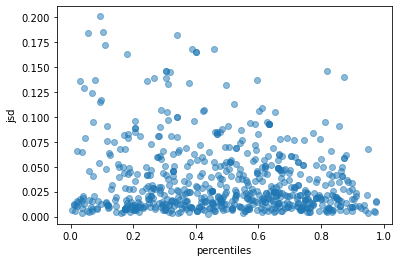

In [96]:
plt.scatter(merged["max_percentile"], merged["jsd"], alpha=0.5)
plt.xlabel("percentiles")
plt.ylabel("jsd")


Text(0, 0.5, 'jsd_x_max_percentile')

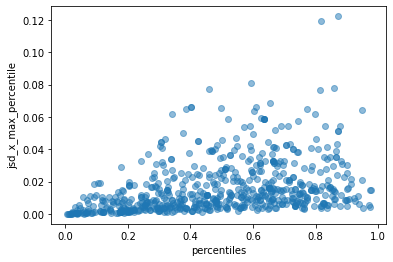

In [95]:
plt.scatter(merged["max_percentile"], merged["jsd_x_max_percentile"], alpha=0.5)
plt.xlabel("percentiles")
plt.ylabel("jsd_x_max_percentile")


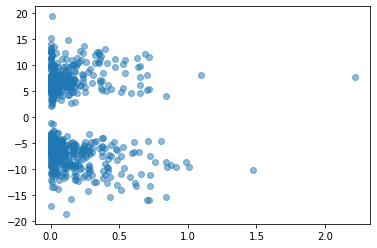

In [77]:
plt.scatter(merged["abs_logfc_x_max_percentile"], merged["Z_score_fixed"], alpha=0.5)

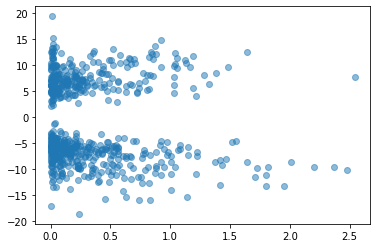

In [78]:
plt.scatter(merged["abs_logfc"], merged["Z_score_fixed"], alpha=0.5)

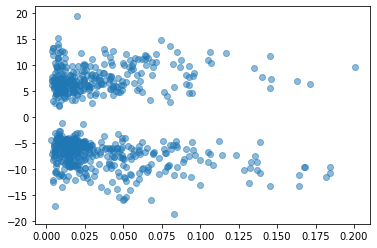

In [80]:
plt.scatter(merged["jsd"], merged["Z_score_fixed"], alpha=0.5)

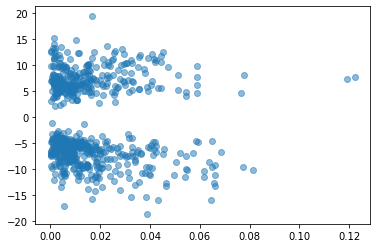

In [81]:
plt.scatter(merged["jsd_x_max_percentile"], merged["Z_score_fixed"], alpha=0.5)

In [60]:
import numpy as np
merged["logfc_x_jsd_x_max_percentile.mean"] = np.sign(merged["logfc.mean"]) * merged["abs_logfc_x_jsd_x_max_percentile.mean"]
merged["logfc_x_jsd.mean"] = np.sign(merged["logfc.mean"]) * merged["abs_logfc_x_jsd.mean"]
merged["sign_jsd.mean"] = np.sign(merged["logfc.mean"]) * merged["jsd.mean"]

#merged["logfc_x_jsd_x_max_percentile.mean"] = np.sign(merged["logfc"]) * merged["abs_logfc_x_jsd_x_max_percentile"]
#merged["logfc_x_jsd.mean"] = np.sign(merged["logfc"]) * merged["abs_logfc_x_jsd"]


KeyError: 'logfc.mean'

In [63]:
#merged["logfc_x_jsd.mean"] = np.sign(merged["logfc"]) * merged["original_jsd"]


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
#merged = merged[merged["peak_overlap"]]
#merged.shape

Text(0.5, 1.0, 'Pearsonr = 0.45')

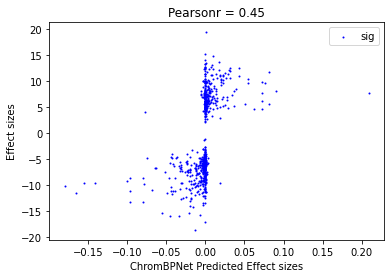

In [26]:
import numpy as np
from scipy.stats import pearsonr

metric="logfc_x_jsd_x_max_percentile.mean"
plt.scatter(merged[metric], merged["Z_score_fixed"].astype(float), s=1, c="b", label="sig")
#plt.scatter(merged["logfc_x_jsd.mean"], merged["Z_score_fixed"].astype(float), s=1, c="b", label="sig")


plt.xlabel("ChromBPNet Predicted Effect sizes")
plt.ylabel("Effect sizes")
plt.legend()
plt.title("Pearsonr = "+str(np.round(pearsonr(merged[metric], merged["Z_score_fixed"].astype(float))[0],2)))


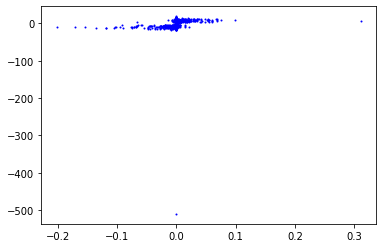

In [30]:
plt.scatter(merged["logfc_x_jsd_x_max_percentile.mean"], merged["Z_score_fixed"].astype(float), s=1, c="b", label="sig")


In [31]:
temp = merged.merge(preds, on='rsid')

In [32]:
temp.shape

(881, 63)

In [33]:
temp

,0_x,1_x,2_x,3_x,4_x,Z_score_perPeak,PeakID,pVal_perPeak,FDR_acrossAllPeaks,caQTL_order,...,8,9,10,11,12,13,14,15,16,17
0,chr1,172625477,C,T,"8.27532,Peak--10018,8.27175e-15,3.013410257978...",8.27532,Peak--10018,8.27175e-15,3.01341025797872e-12,1,...,0.058167,8.27532,Peak--10018,8.271750e-15,3.013410e-12,1,rs12123755,0.816922,8.27532,NaN
1,chr2,205546600,C,G,"-4.27606,Peak--100410,0.0009764306,0.039337899...",-4.27606,Peak--100410,0.0009764306,0.0393378999332549,1,...,0.010136,-4.27606,Peak--100410,9.764306e-04,3.933790e-02,1,rs6435287,0.572607,5.55393,5.55393
2,chr2,206246233,T,G,"4.69718,Peak--100463,0.0005328315,0.0242209639...",4.69718,Peak--100463,0.0005328315,0.0242209639334071,1,...,0.041800,4.69718,Peak--100463,5.328315e-04,2.422096e-02,1,rs12373575,1.080930,6.87351,6.87351
3,chr2,207619956,C,T,"-8.15637,Peak--100563,1.305021e-14,4.647096096...",-8.15637,Peak--100563,1.305021e-14,4.64709609681109e-12,1,...,0.042784,-8.15637,Peak--100563,1.305021e-14,4.647096e-12,1,rs72958143,-1.238900,-9.13315,9.13315
4,chr2,208064876,G,A,"-7.59659,Peak--100587,1.021561e-11,2.443493043...",-7.59659,Peak--100587,1.021561e-11,2.4434930433760203e-09,1,...,0.027635,-7.59659,Peak--100587,1.021561e-11,2.443493e-09,1,rs6746998,-0.719865,-6.28075,7.69975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,chr2,180125824,G,A,"-5.29334,Peak--98034,3.567039e-05,0.0024446472...",-5.29334,Peak--98034,3.567039e-05,0.0024446472153902,1,...,-0.055398,-5.29334,Peak--98034,3.567039e-05,2.444647e-03,1,rs1518431,-0.696420,-5.96609,6.16031
877,chr1,169513439,G,A,"4.17276,Peak--9849,0.0006443162,0.028227094317...",4.17276,Peak--9849,0.0006443162,0.0282270943175267,1,...,0.037082,4.17276,Peak--9849,6.443162e-04,2.822709e-02,1,rs9332673,0.558940,4.17276,NaN
878,chr2,197453058,C,T,"4.76994,Peak--99809,1.825632e-05,0.00135773687...",4.76994,Peak--99809,1.825632e-05,0.001357736877756,1,...,-0.005145,4.76994,Peak--99809,1.825632e-05,1.357737e-03,1,rs3731570,0.828246,6.83333,7.11778
879,chr2,198097195,A,G,"6.07593,Peak--99845,9.899754e-08,1.19650756197...",6.07593,Peak--99845,9.899754e-08,1.19650756197882e-05,1,...,0.014918,6.07593,Peak--99845,9.899754e-08,1.196508e-05,1,rs3771359,0.436354,6.07593,NaN


In [34]:
preds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,rsid
0,chr10,10418893,10418894,C,T,"-6.1074,Peak--16416,7.180755e-08,8.92019955761...",0.013551,19.763767,0.014234,-6.10740,Peak--16416,7.180755e-08,8.920200e-06,1,rs2252364,0.916856,11.32610,11.32610,chr10_10418894_C_T
1,chr10,105970115,105970116,C,A,"-9.64365,Peak--22566,9.988293e-20,7.1507129252...",0.226766,63.738033,0.032317,-9.64365,Peak--22566,9.988293e-20,7.150713e-17,1,rs489194,1.044090,9.51814,9.60528,chr10_105970116_C_A
2,chr10,110447569,110447570,G,A,"9.36925,Peak--22961,1.2491510000000001e-18,7.7...",-0.083220,-45.974030,-0.023864,9.36925,Peak--22961,1.249151e-18,7.730664e-16,1,rs10787237,-1.138820,-11.74160,11.74160,chr10_110447570_G_A
3,chr10,112232799,112232800,C,T,"-4.32539,Peak--23102,0.000339859,0.01677383360...",-0.004250,-12.041867,-0.007823,-4.32539,Peak--23102,3.398590e-04,1.677383e-02,1,rs7922421,-0.525237,-4.32539,NaN,chr10_112232800_C_T
4,chr10,114708987,114708988,C,T,"-6.10874,Peak--23268,4.501371e-08,5.794979285e...",0.086655,26.410883,0.013653,-6.10874,Peak--23268,4.501371e-08,5.794979e-06,1,rs703348,0.895974,6.97198,6.97198,chr10_114708988_C_T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,chr9,806911,806912,C,G,"-4.63851,Peak--202061,0.0005996548,0.026622444...",-0.080937,-43.456330,-0.019741,-4.63851,Peak--202061,5.996548e-04,2.662244e-02,1,rs35469085,-0.323678,-3.29357,4.05663,chr9_806912_C_G
657,chr9,8261909,8261910,A,G,"10.8919,Peak--202593,5.921251e-25,9.2871431905...",0.070271,25.326527,0.020460,10.89190,Peak--202593,5.921251e-25,9.287143e-22,1,rs3847281,-0.954290,-11.41850,11.41850,chr9_8261910_A_G
658,chr9,83219827,83219828,T,G,"7.34037,Peak--207178,5.878915e-11,1.2439929447...",0.079742,306.005650,0.147448,7.34037,Peak--207178,5.878915e-11,1.243993e-08,1,rs12237222,0.309569,7.34037,NaN,chr9_83219828_T_G
659,chr9,98104589,98104590,T,C,"-5.03487,Peak--207976,3.693932e-05,0.002519009...",-0.228785,-74.406364,-0.039111,-5.03487,Peak--207976,3.693932e-05,2.519009e-03,1,rs7022455,-0.710929,-6.26936,6.26936,chr9_98104590_T_C


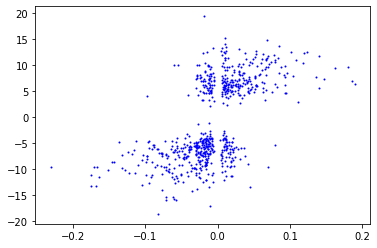

In [35]:
plt.scatter(preds[8], preds[16].astype(float), s=1, c="b", label="sig")


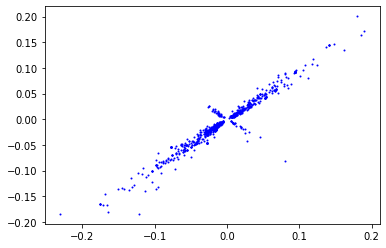

In [47]:
plt.scatter(temp[8], np.sign(temp["logfc"].astype(float))*temp["original_jsd"].astype(float), s=1, c="b", label="sig")


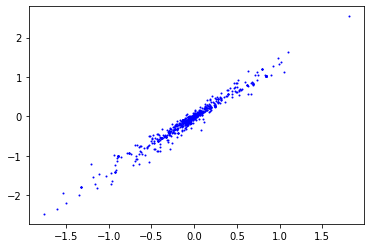

In [44]:
plt.scatter(temp[6], temp["logfc"].astype(float), s=1, c="b", label="sig")


In [45]:
pearsonr(preds[8], preds[16])

(0.6017685080770598, 2.35533003589732e-66)

In [49]:
pearsonr(np.sign(temp["logfc"].astype(float))*temp["original_jsd"].astype(float), temp[16])

(0.6100308978402438, 6.383374603928803e-91)

Text(0, 0.5, 'jsd')

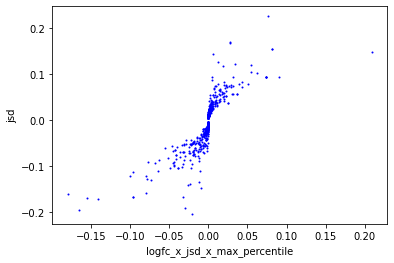

In [30]:
import numpy as np
from scipy.stats import pearsonr

metric="logfc_x_jsd_x_max_percentile.mean"
metric2="sign_jsd.mean"
plt.scatter(merged[metric], merged[metric2].astype(float), s=1, c="b", label="sig")
plt.xlabel("logfc_x_jsd_x_max_percentile")
plt.ylabel("jsd")


In [35]:
merged.columns

Index([                                           0,
                                                  1,
                                                  2,
                                                  3,
                                                  4,
                                  'Z_score_perPeak',
                                           'PeakID',
                                     'pVal_perPeak',
                               'FDR_acrossAllPeaks',
                                      'caQTL_order',
                                          'Variant',
                                             'Beta',
                                    'Z_score_fixed',
                                   'Z_score_random',
                                             'rsid',
                                              'chr',
                                              'pos',
                                          'allele1',
                                          'all